# Test 2: Histograms
Test my histogram plot.

## 1. Import Packages

In [1]:
# The Python Standard Library

# The Third-Party Library
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

# My Packages

# increase figure showing resolution
%config InlineBackend.figure_format = 'retina'

## 2. Datasets

In [2]:
# 1. data
# data 1: 19 events
# observable a: 0:5, 1:3, 2:1, 3:1, 4:1, 5:1, 6:2, 7:5
a1 = np.array([0, 0, 1, 2, 3, 4, 7, 1, 1, 7, 7, 7, 7, 5, 6, 6, 0, 0, 0])
# observable b: 0:0, 1:1, 2:2, 3:3, 4:2, 5:5, 6:2, 7:1, 8:2, 9:1
b1 = np.array([1, 2, 2, 3, 3, 3, 4, 5, 5, 5, 5, 5, 6, 6, 7, 8, 8, 9, 4])
# selected events: it must be the same shape as 'observable'.
selected1 = np.arange(19)
# weight for data 1: 19 events
# a1: 0:10, 1:6, 2:2, 3:2, 4:2, 5:2, 6:4, 7:13
# b1: 0:0, 1:2, 2:4, 3:6, 4:5, 5:10, 6:6, 7:2, 8:4, 9:2
weight_1 = np.array([2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2])
# selected_1 = np.array([7, 7, 7, 12])

# data 2: 34 events
# observable a: 0:0, 1:1, 2:2, 3:3, 4:4, 5:5, 6:6, 7:7, 8:4, 9:2
a2 = np.array([1, 2, 2, 9, 9, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5,
               6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8])
# observable b: 0:2, 1:4, 2:7, 3:6, 4:5, 5:4, 6:3, 7:2, 8:1, 9:0
b2 = np.array([0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
               3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 7, 7, 8])
selected2 = np.arange(34)
# weight for data 2: 37 events = 34 + 3, length of weight may be different with observable.
# a2: 0:0, 1:2, 2:4, 3:6, 4:8, 5:10, 6:12, 7:17, 8:12, 9:6
# b2: 0:4, 1:10, 2:14, 3:12, 4:10, 5:11, 6:6, 7:4, 8:6, 9:0
weight_all2 = np.full(34, 2)
weight_2 = np.insert(weight_all2, [4, 23, 31], [4, 5, 6])
# weight_2

In [3]:
# create datasets: df_1 and df_2
data_1 = {'a': a1, 'b': b1, 'selected': selected1}
data_2 = {'a': a2, 'b': b2, 'selected': selected2}
df_1 = pd.DataFrame(data_1)
df_2 = pd.DataFrame(data_2)

df_1.head()

,a,b,selected
0,0,1,0
1,0,2,1
2,1,2,2
3,2,3,3
4,3,3,4


## 3. Basic
1. Use `np.array()` to plot histogram
2. Use `pd.DataFrame()` to plot histogram

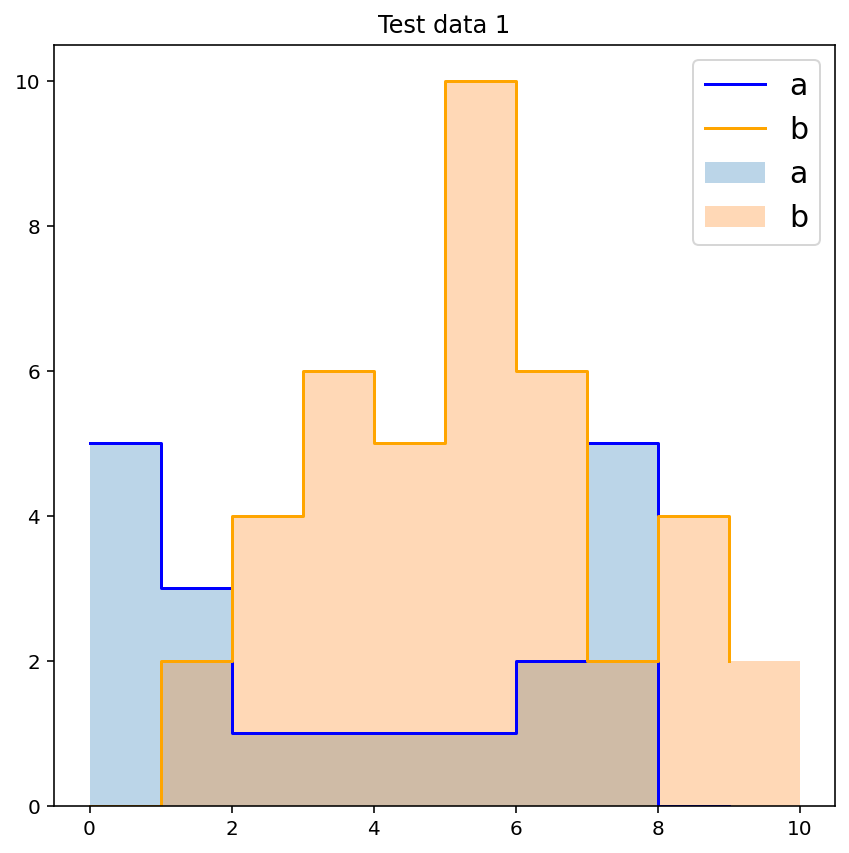

In [4]:
# (1) plot data 1 by using np.array()
# 1. data

# 2. construct figure
fig, ax = plt.subplots(1, 1, figsize=(7,7))
binning = np.linspace(0, 10, 11)

# 3. plot
# data a: use hist and step
ax.hist(a1, bins=binning, alpha=0.3, label="a")
hist_a, bins_a = np.histogram(a1, bins=binning)
ax.step(bins_a[:-1], hist_a, where='post', color='blue', label="a")
# data b: use hist and step with weights
ax.hist(b1, bins=binning, weights=weight_1, alpha=0.3, label="b")
hist_b, bins_b = np.histogram(b1, bins=binning, weights=weight_1)
ax.step(binning[:-1], hist_b, where='post', color='orange', label="b")

# 4. customize plot
ax.legend(fontsize=15)
ax.set_title("Test data 1")

# 5. save and show plot
plt.show()

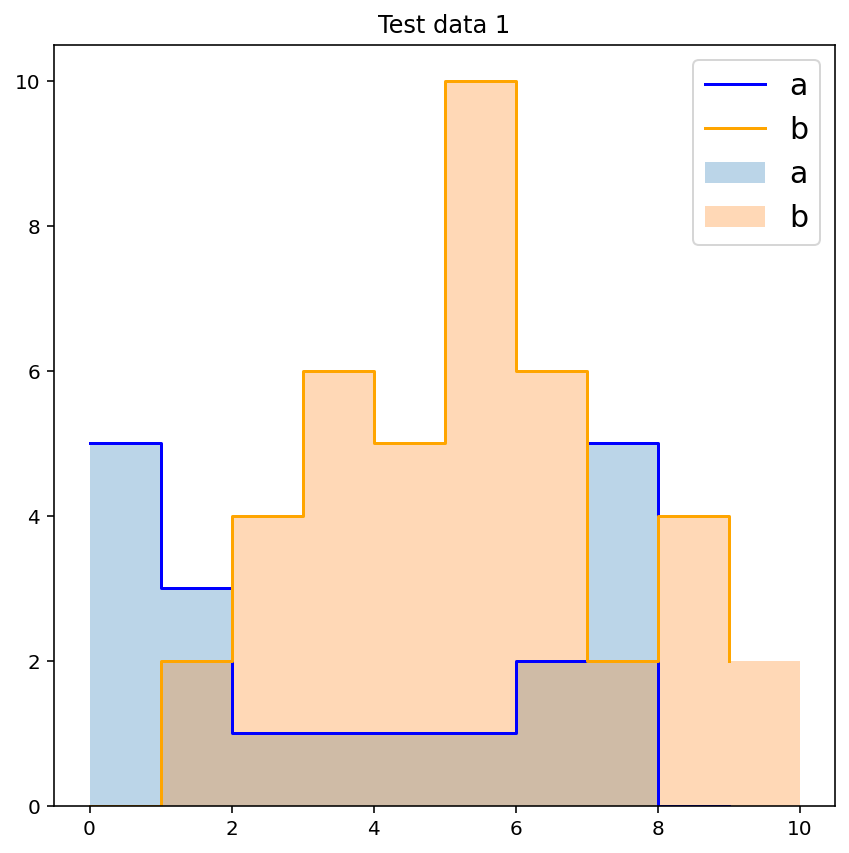

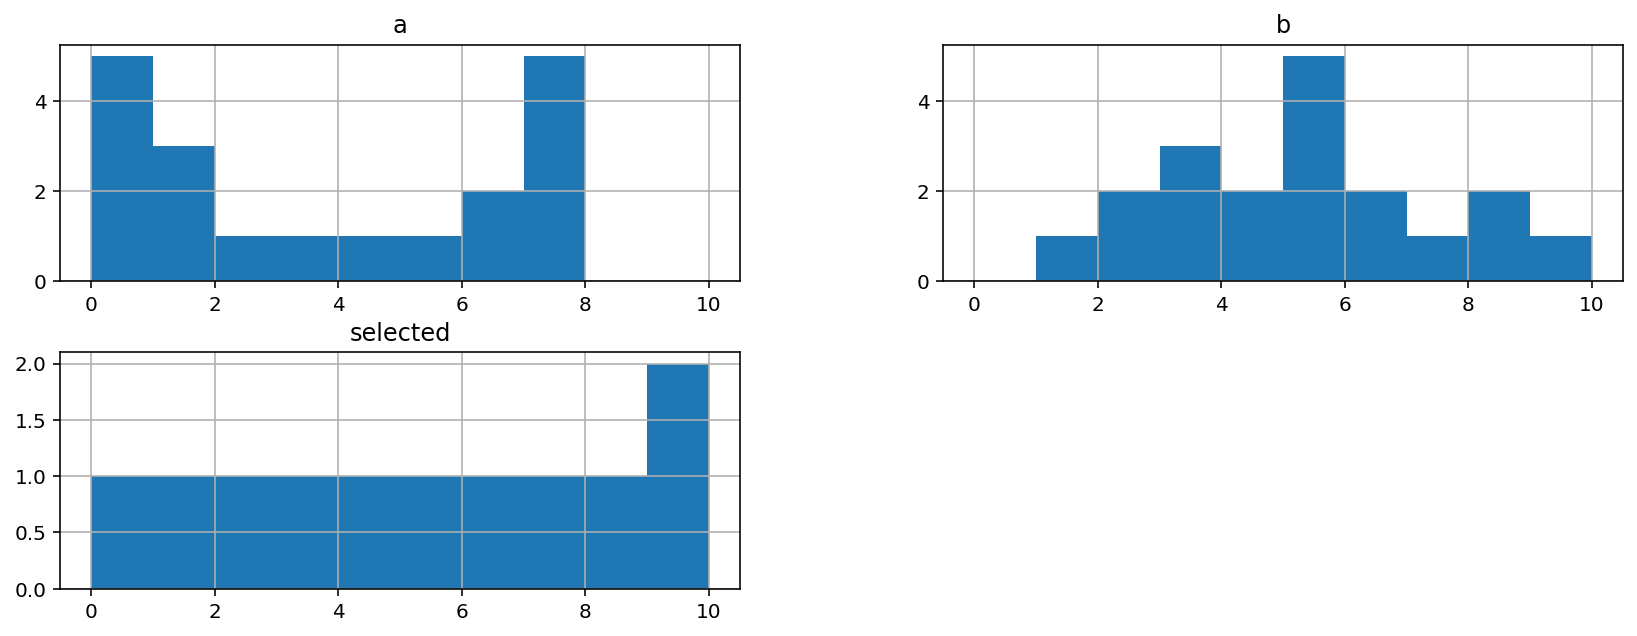

In [5]:
# (2) plot data 1 by using pd.DataFrame()
# 1. data

# 2. construct figure
fig, ax = plt.subplots(1, 1, figsize=(7,7))
binning = np.linspace(0, 10, 11)

# 3. plot
# 3-1. with matplotlib
# data a: use hist(pd.DataFrame().variable) and step
ax.hist(df_1.a, bins=binning, alpha=0.3, label="a")
hist_a, bins_a = np.histogram(a1, bins=binning)
ax.step(bins_a[:-1], hist_a, where='post', color='blue', label="a")
# data b: use hist(pd.DataFrame()['variable']) and step with weights
ax.hist(df_1['b'], bins=binning, weights=weight_1, alpha=0.3, label="b")
hist_b, bins_b = np.histogram(b1, bins=binning, weights=weight_1)
ax.step(binning[:-1], hist_b, where='post', color='orange', label="b")
# 3-2. with pandas
# df_1.hist(bins=10)
df_1.hist(bins=binning, figsize=(14,5))

# 4. customize plot
ax.legend(fontsize=15)
ax.set_title("Test data 1")

# 5. save and show plot
plt.show()

(array([1., 2., 3., 2., 0., 5., 2., 1., 2., 1.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <BarContainer object of 10 artists>)

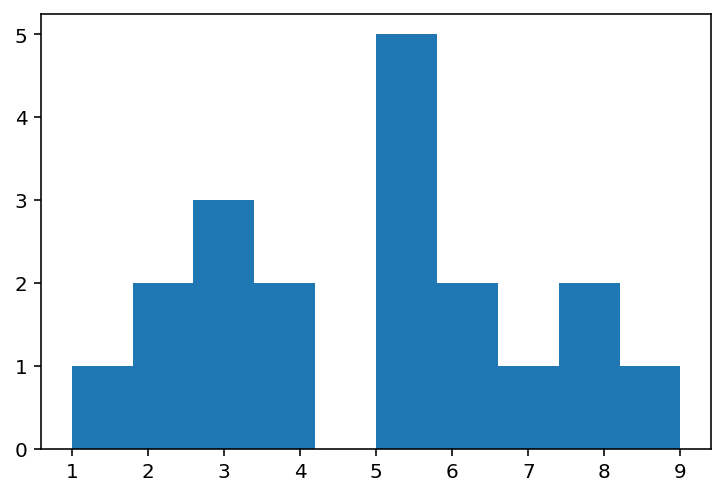

In [6]:
# ?? I don't understand??
counts, bins = np.histogram(b1)
plt.hist(bins[:-1], bins, weights=counts)

## 4. Multiple DataSets
Because the shapes of datasets may be different, I
1. use `list` to collect `np.array()` and for loop
    * dataset = [ np.array(a1), np.array(a2), ... ]
2. use `list` to collect `pd.DataFrame` and for loop
    * dataset = [ pd.DataFrame(data1), pd.DataFrame(data2), ... ]
3. use `list` to collect `np.array()` and without for loop
    * dataset = [ np.array(a1), np.array(a2), ... ]
    * But this is some problem, I didn't modify it. lazy...

I use `list` to store `weight` and `selected` objects with different shape:
* weight = [ weight_1, weight_2, ... ]
* selected = [ selected_1, selected_2, ... ]

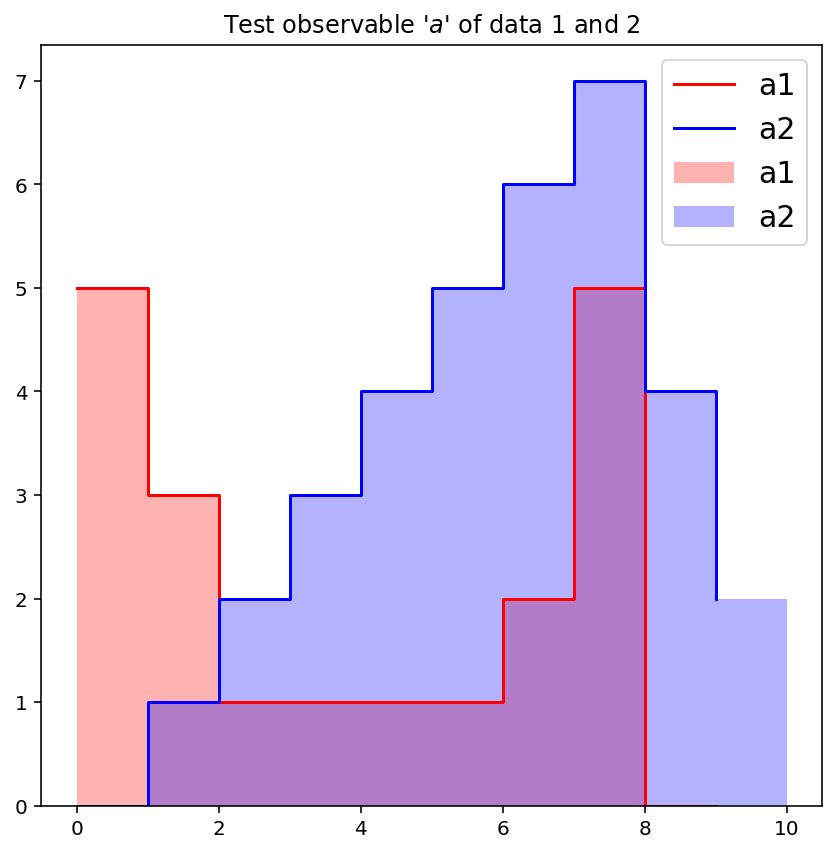

In [14]:
# (1) Use list to collect np.array() and for loop
# 1. data
dataset = [a1, a2]
data_color = ['red', 'blue']
data_label = ["a1", "a2"]
# weight = [weight_1, weight_2]
# weight = [weight_1, weight_all2]
weight = [weight_all2, weight_all2]
selected = [selected1, selected2]

# 2. construct figure
fig, ax = plt.subplots(1, 1, figsize=(7,7))
binning = np.linspace(0, 10, 11)

# 3. plot
for i in range(len(dataset)):
    ax.hist(dataset[i], bins=binning, color=data_color[i], label=data_label[i], alpha=0.3)
    hist, bins = np.histogram(dataset[i], bins=binning)
    ax.step(bins[:-1], hist, where='post', color=data_color[i], label=data_label[i])
    # with weights=
    # ax.hist(dataset[i], bins=binning, color=data_color[i], label=data_label[i], alpha=0.3, weights=weight[i][selected[i]])
    # hist, bins = np.histogram(dataset[i], bins=binning, weights=weight[i][selected[i]])
    # ax.step(bins[:-1], hist, where='post', color=data_color[i], label=data_label[i])

# 4. customize plot
ax.set_title(r"Test observable '$a$' of data 1 and 2")
ax.legend(fontsize=15)

# 5. save and show plot
plt.show()

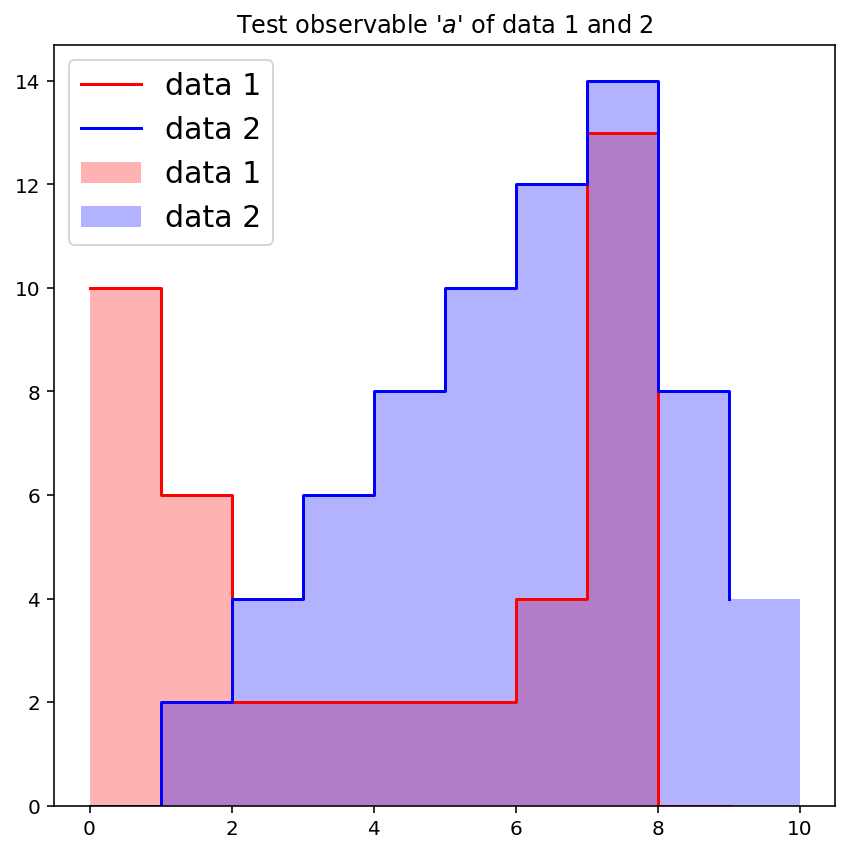

In [15]:
# (2) Use list to collect pd.DataFrame() and for loop
# 1. data
obs = 'a'
dataset = [df_1, df_2]
data_color = ['red', 'blue']
data_label = ["data 1", "data 2"]
# weight = [weight_1, weight_2]
weight = [weight_1, weight_all2]
# weight = [weight_all2, weight_all2]
selected = [selected1, selected2]

# 2. construct figure
fig, ax = plt.subplots(1, 1, figsize=(7,7))
binning = np.linspace(0, 10, 11)

# 3. plot
for i, data in enumerate(dataset):
    # ax.hist(data[obs], bins=binning, color=data_color[i], label=data_label[i], alpha=0.3)
    # hist, bins = np.histogram(data[obs].to_numpy(), bins=binning, weights=None)
    # ax.step(bins[:-1], hist, where='post', color=data_color[i], label=data_label[i])
    # with weights=
    ax.hist(data[obs], bins=binning, color=data_color[i], label=data_label[i], alpha=0.3, weights=weight[i][selected[i]])
    hist, bins = np.histogram(data[obs].to_numpy(), bins=binning, weights=weight[i][selected[i]])
    ax.step(bins[:-1], hist, where='post', color=data_color[i], label=data_label[i])

# 4. customize plot
ax.set_title(r"Test observable '$a$' of data 1 and 2")
ax.legend(fontsize=15)

# 5. save and show plot
plt.show()

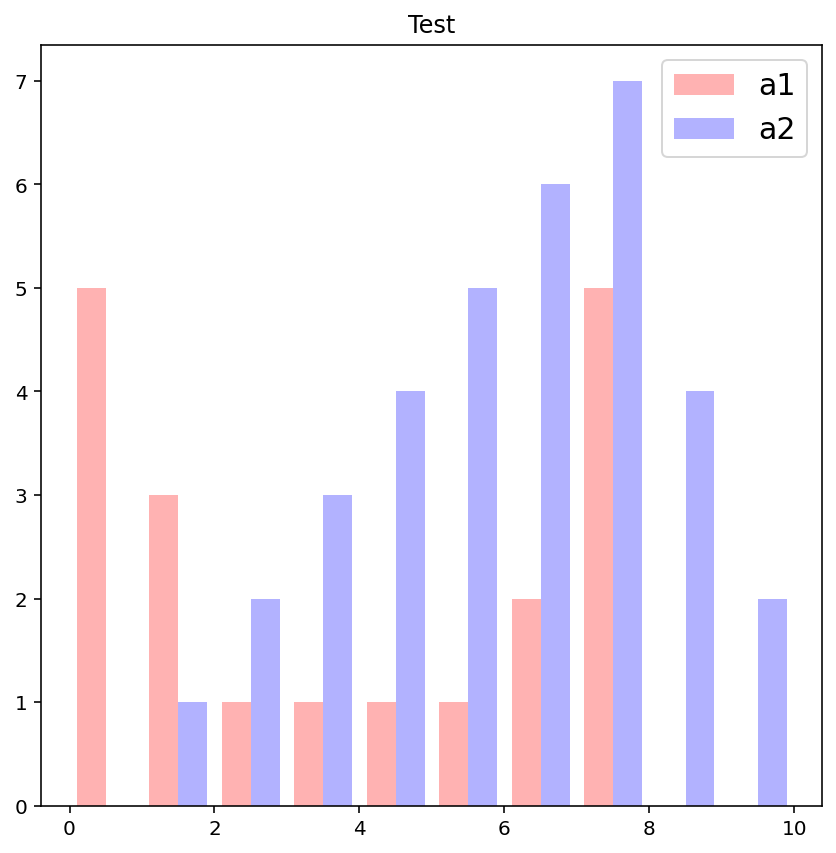

In [9]:
# (3) Use list to store np.array() and without for loop, but I didn't modify code..., lazy...
# 1. data
data = [a1, a2]
data_color = ['red', 'blue']
data_label = ["a1", "a2"]

# 2. construct figure
fig, ax = plt.subplots(1, 1, figsize=(7,7))
binning = np.linspace(0, 10, 11)

# 3. plot
ax.hist(data, bins=binning, color=data_color, label=data_label, alpha=0.3)
# hist, bins = np.histogram(data, bins=binning) # error
# ax.step(bins[:-1], hist, where='post', color=data_color, label=data_label)

# 4. customize plot
ax.set_title("Test")
ax.legend(fontsize=15)

# 5. save and show plot
plt.show()

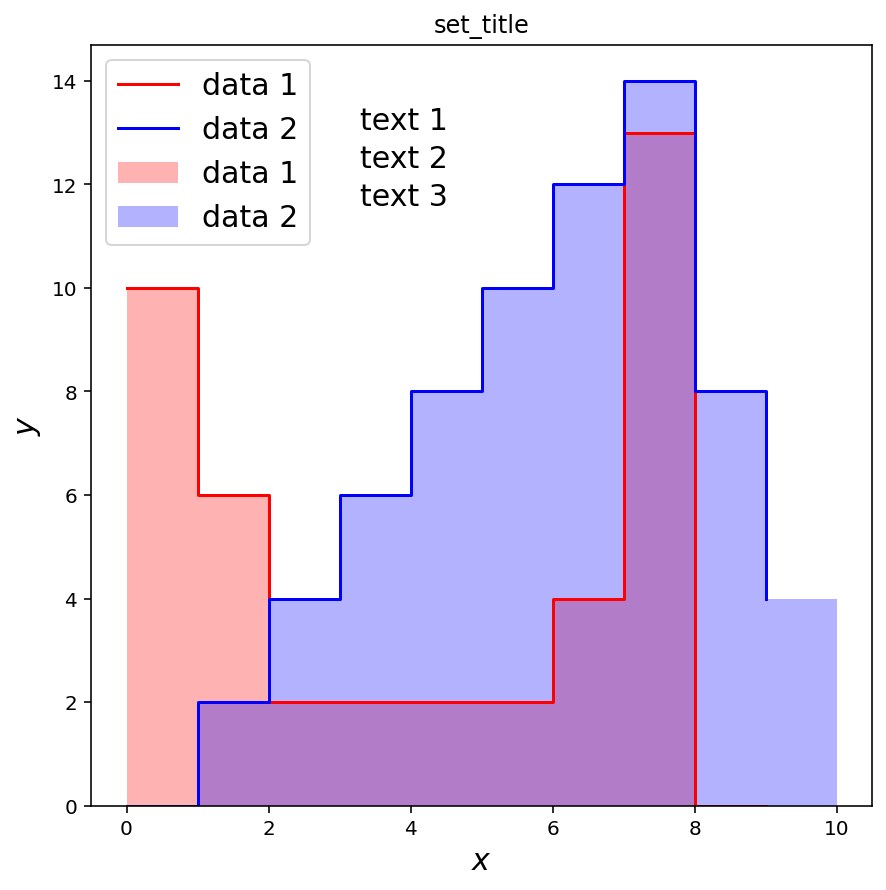

In [41]:
# test: copy from
# (2) Use list to collect pd.DataFrame() and for loop
# 1. data
obs = 'a'
dataset = [df_1, df_2]
data_color = ['red', 'blue']
data_label = ["data 1", "data 2"]
# weight = [weight_1, weight_2]
weight = [weight_1, weight_all2]
# weight = [weight_all2, weight_all2]
selected = [selected1, selected2]
# text = []
text = ['text 1', 'text 2', 'text 3']
text_xy=(0.4, 0.9)

# 2. construct figure
fig, ax = plt.subplots(1, 1, figsize=(7,7))
binning = np.linspace(0, 10, 11)

# 3. plot
for i, data in enumerate(dataset):
    # ax.hist(data[obs], bins=binning, color=data_color[i], label=data_label[i], alpha=0.3)
    # hist, bins = np.histogram(data[obs].to_numpy(), bins=binning, weights=None)
    # ax.step(bins[:-1], hist, where='post', color=data_color[i], label=data_label[i])
    # with weights=
    ax.hist(data[obs], bins=binning, color=data_color[i], label=data_label[i], alpha=0.3, weights=weight[i][selected[i]])
    hist, bins = np.histogram(data[obs].to_numpy(), bins=binning, weights=weight[i][selected[i]])
    ax.step(bins[:-1], hist, where='post', color=data_color[i], label=data_label[i])

# 4. customize plot
fig.suptitle(None, fontsize=20)
ax.legend(fontsize=15)
ax.set_title('set_title')
ax.set_xlabel(r'$x$', fontsize=15)
ax.set_ylabel(r'$y$', fontsize=15)
ax.set_yscale('linear')
ax.set_xlim(None)
ax.set_ylim(None)
for j, tex in enumerate(text):
    ax.text(text_xy[0], text_xy[1] - j/20, tex,
            horizontalalignment='center', verticalalignment='center',
            transform=ax.transAxes, fontsize=15)

# 5. save and show plot
plt.show()

## 5. Define `plotting` Function

In [31]:
def plotting(obs, dataset, binning, data_color, data_label, weight=None,
             figsize=(10, 10), suptitle=None, set_title='set_title',
             xlabel=r'$x$', ylabel=r'$y$', yscale='linear', xlim=None, ylim=None,
             text=[], text_xy=(0.1, 0.9), savefig="figure.pdf"):
    # obs=str, dataset=[df1, df2, ...], binning=array, ...
    # 1. construct figure
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    # binning = np.linspace(0, 10, 11)
    
    # 2. plot
    for i, data in enumerate(dataset):
        ax.hist(data[obs], bins=binning, weights=weight,
                color=data_color[i], label=data_label[i], alpha=0.3)
        hist, bins = np.histogram(data[obs].to_numpy(), bins=binning, weights=weight)
        ax.step(bins[:-1], hist, where='post', color=data_color[i], label=data_label[i])
        
    # 3. customize plot
    # title and legend
    fig.suptitle(suptitle, fontsize=20)
    ax.legend(fontsize=15)
    # sub-title and x & y labels
    ax.set_title(set_title, fontsize=15)
    # xlabel = r'$x$ [GeV]'
    # ylabel = r'$\frac{d\sigma}{dx}$ [pb/10 GeV]'
    ax.set_xlabel(xlabel, fontsize=15)
    ax.set_ylabel(ylabel, fontsize=15)
    # x & y axis scales, limits, and tick
    ax.set_yscale(yscale)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    # ax.tick_params(axis='both', labelsize=10)
    # text
    for j, tex in enumerate(text):
        ax.text(text_xy[0], text_xy[1] - j/20, tex,
                horizontalalignment='center', verticalalignment='center',
                transform=ax.transAxes, fontsize=15)
    
    # 4. save and show plot
    plt.savefig(savefig)
    plt.show()

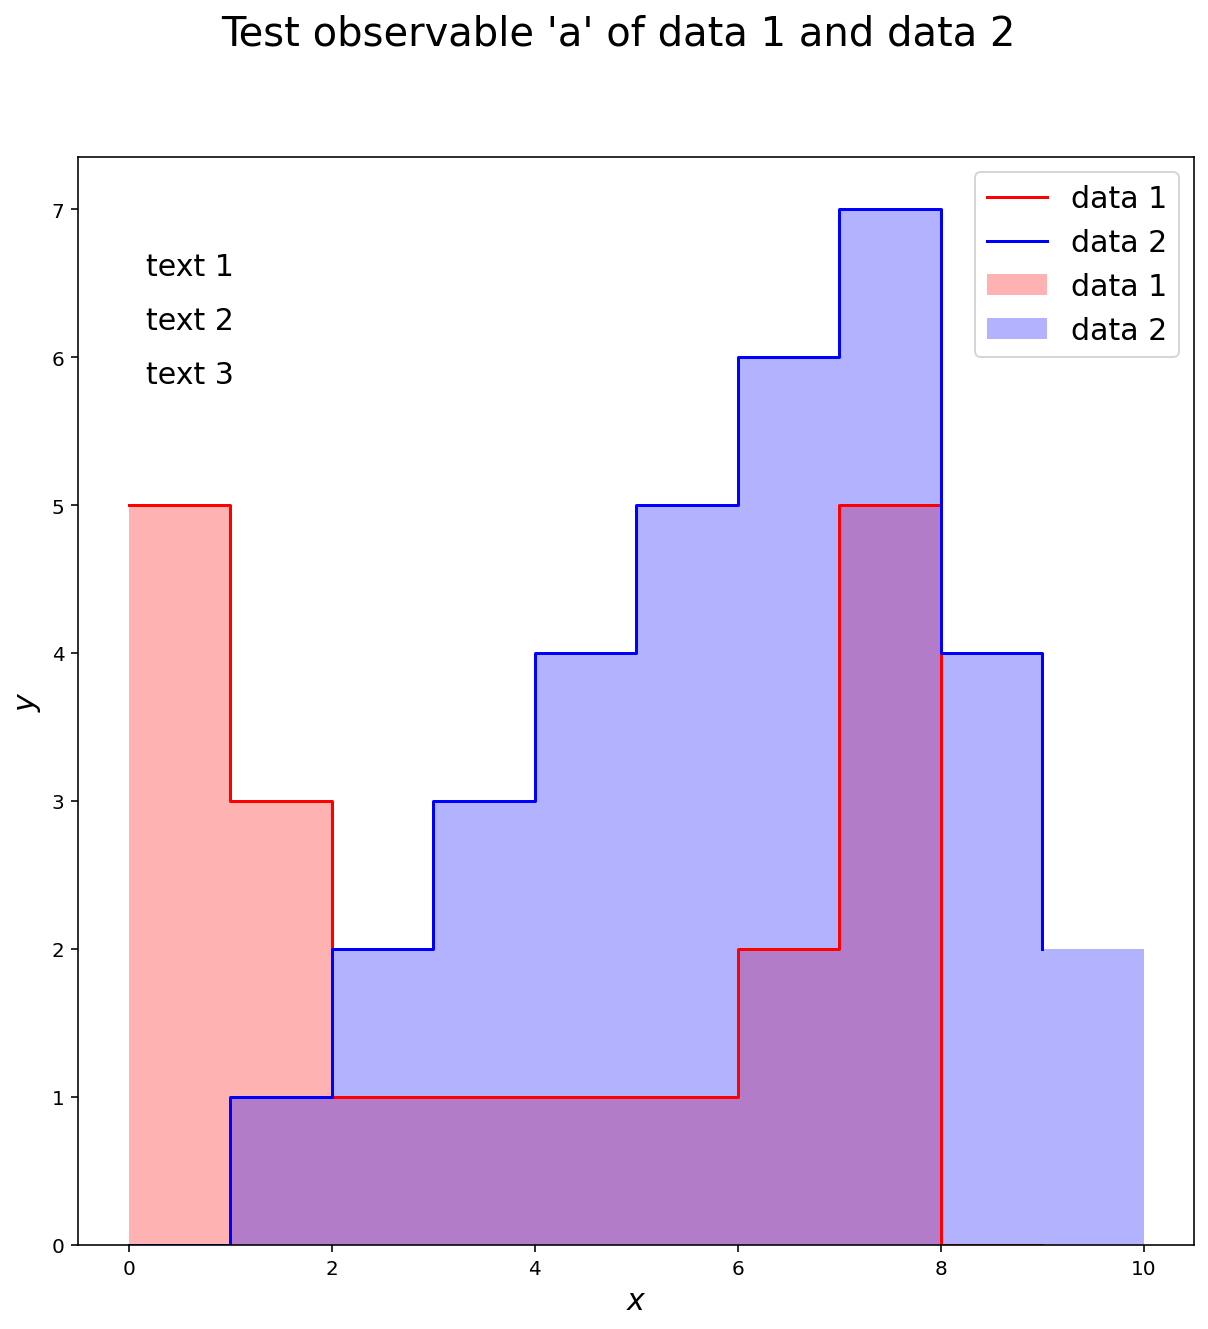

In [34]:
# delete
plotting('a', [df_1, df_2], np.linspace(0, 10, 11),
         ['red', 'blue'], ['data 1', 'data 2'],
         suptitle="Test observable 'a' of data 1 and data 2",
         text=['text 1', 'text 2', 'text 3'])

## 6. Test

In [9]:
dataset = [a1, a2]
for i, data in enumerate(dataset):
    print(i, data)
    print('-'*80)

0 [0 0 1 2 3 4 7 1 1 7 7 7 7 5 6 6 0 0 0]
--------------------------------------------------------------------------------
1 [1 2 2 9 9 3 3 3 4 4 4 4 5 5 5 5 5 6 6 6 6 6 6 7 7 7 7 7 7 7 8 8 8 8]
--------------------------------------------------------------------------------


In [10]:
obs = 'a'
dataset = [df_1, df_2]
aa = [a1, a2]
for i, data in enumerate(dataset):
    print(i)
    print(data[obs].to_numpy())
    print(np.sum(data[obs].to_numpy() - aa[i]))
    print('-'*80)

0
[0 0 1 2 3 4 7 1 1 7 7 7 7 5 6 6 0 0 0]
0
--------------------------------------------------------------------------------
1
[1 2 2 9 9 3 3 3 4 4 4 4 5 5 5 5 5 6 6 6 6 6 6 7 7 7 7 7 7 7 8 8 8 8]
0
--------------------------------------------------------------------------------


In [11]:
df_1['a'].to_numpy()

array([0, 0, 1, 2, 3, 4, 7, 1, 1, 7, 7, 7, 7, 5, 6, 6, 0, 0, 0])

In [14]:
np.random.seed(19680801)

x_multi = [np.random.randn(n) for n in [10000, 5000, 2000]]
x_multi

[array([ 1.04930431,  0.86609917,  0.5511346 , ..., -0.29839747,
        -1.7807711 , -1.52843117]),
 array([ 0.48360943,  1.31836016,  0.58457725, ...,  0.88905856,
        -1.70930378,  0.05470711]),
 array([ 0.04622943, -0.09027726,  0.37224902, ..., -0.0990983 ,
        -1.3352778 ,  1.72813864])]

In [15]:
[x_multi[i].shape for i in range(3)]

[(10000,), (5000,), (2000,)]

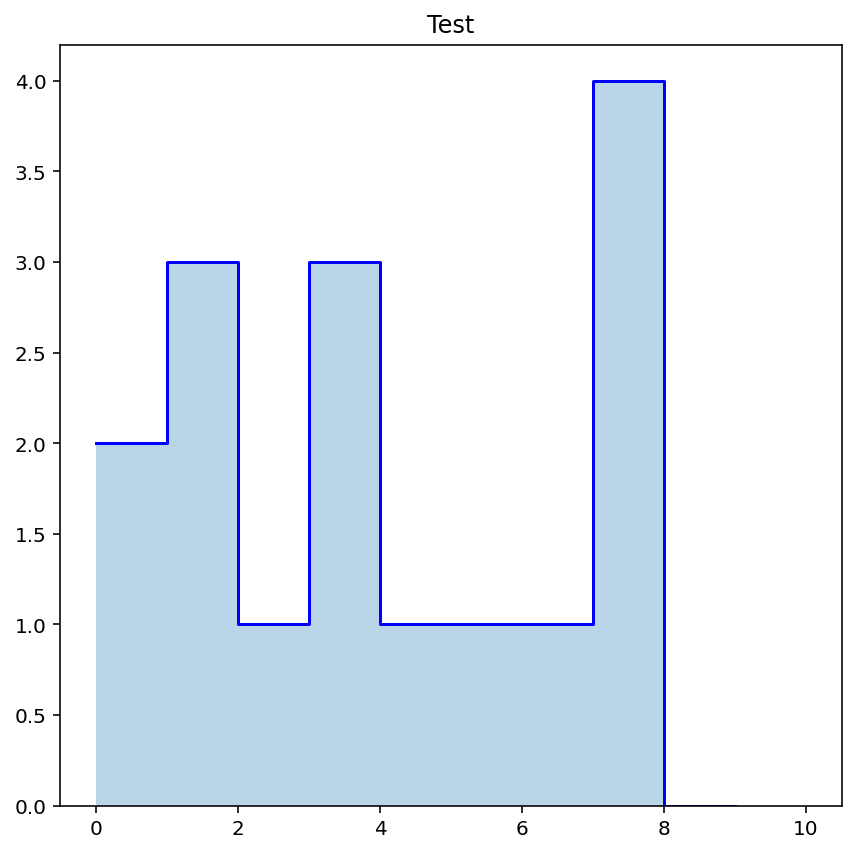

In [16]:
# 1. data
# data a: 0:2, 1:3, 2:1, 3:3, 4:1, 5:1, 6:1, 7:4
a = np.array([0, 0, 1, 2, 3, 4, 7, 3, 3, 1, 1, 7, 7, 7, 5, 6])

# 2. construct figure
fig, ax = plt.subplots(1, 1, figsize=(7,7))
binning = np.linspace(0, 10, 11)

# 3. plot
# data a: use hist and step
z = ax.hist(a, bins=binning, alpha=0.3)
hist_a, bins_a = np.histogram(a, bins=binning)
ax.step(bins_a[:-1], hist_a, where='post', color='blue')

# 4. customize plot
ax.set_title("Test")

# 5. save and show plot
plt.show()

In [17]:
z

(array([2., 3., 1., 3., 1., 1., 1., 4., 0., 0.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

In [18]:
hist_a - z[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [19]:
bins_a - z[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [36]:
# text = ['text 1', 'text 2']
text = []
for j, tex in enumerate(text):
    print(j, tex)
print('-'*10)
print(len(text))

----------
0
